**Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyampute.exploration.mcar_statistical_tests import MCARTest

**Loading and Understanding the Dataset**

In [2]:
train_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")

X_train = train_dataset.iloc[:, :-1]
y_train = train_dataset.iloc[:, -1]



In [3]:
X_train.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House


In [4]:
y_train.head()

0    2869.0
1    1483.0
2     567.0
3     765.0
4    2022.0
Name: Premium Amount, dtype: float64

In [5]:
X_test = test_dataset.iloc[:, :-1]


X_test.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly


In [6]:
print("information about Training data")
train_info = train_dataset.info()

information about Training data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  In

In [7]:
print("information about Testing data")
test_info = test_dataset.info()

information about Testing data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    800000 non-null  int64  
 1   Age                   787511 non-null  float64
 2   Gender                800000 non-null  object 
 3   Annual Income         770140 non-null  float64
 4   Marital Status        787664 non-null  object 
 5   Number of Dependents  726870 non-null  float64
 6   Education Level       800000 non-null  object 
 7   Occupation            560875 non-null  object 
 8   Health Score          750551 non-null  float64
 9   Location              800000 non-null  object 
 10  Policy Type           800000 non-null  object 
 11  Previous Claims       557198 non-null  float64
 12  Vehicle Age           799997 non-null  float64
 13  Credit Score          708549 non-null  float64
 14  Insurance Duration   

**Analysing dataset for missing data and how to handle them**

In [8]:
miss_count_train = train_dataset.isnull().sum()
miss_count_test = test_dataset.isnull().sum()
display(miss_count_train)
display(miss_count_test)

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

id                           0
Age                      12489
Gender                       0
Annual Income            29860
Marital Status           12336
Number of Dependents     73130
Education Level              0
Occupation              239125
Health Score             49449
Location                     0
Policy Type                  0
Previous Claims         242802
Vehicle Age                  3
Credit Score             91451
Insurance Duration           2
Policy Start Date            0
Customer Feedback        52276
Smoking Status               0
Exercise Frequency           0
Property Type                0
dtype: int64

**Converting Categorical Column to Numerical Datatype**

In [9]:
data_types = train_dataset.dtypes
print(data_types)

id                        int64
Age                     float64
Gender                   object
Annual Income           float64
Marital Status           object
Number of Dependents    float64
Education Level          object
Occupation               object
Health Score            float64
Location                 object
Policy Type              object
Previous Claims         float64
Vehicle Age             float64
Credit Score            float64
Insurance Duration      float64
Policy Start Date        object
Customer Feedback        object
Smoking Status           object
Exercise Frequency       object
Property Type            object
Premium Amount          float64
dtype: object


In [10]:
train_dataset = train_dataset.drop('Policy Start Date', axis=1)

In [12]:
unique_values_gender = train_dataset['Gender'].unique()
display(unique_values_gender)

unique_values_marital_status = train_dataset['Marital Status'].unique()
display(unique_values_marital_status)

unique_values_education_level = train_dataset['Education Level'].unique()
display(unique_values_education_level)

unique_values_occupation = train_dataset['Occupation'].unique()
display(unique_values_occupation)

unique_values_location = train_dataset['Location'].unique()
display(unique_values_location)

unique_values_policy_type = train_dataset['Policy Type'].unique()
display(unique_values_policy_type)

unique_values_cf = train_dataset['Customer Feedback'].unique()
display(unique_values_cf)

unique_values_ss = train_dataset['Smoking Status'].unique()
display(unique_values_ss)

unique_values_ef = train_dataset['Exercise Frequency'].unique()
display(unique_values_ef)

unique_values_pt = train_dataset['Property Type'].unique()
display(unique_values_pt)




array(['Female', 'Male'], dtype=object)

array(['Married', 'Divorced', 'Single', nan], dtype=object)

array(["Bachelor's", "Master's", 'High School', 'PhD'], dtype=object)

array(['Self-Employed', nan, 'Employed', 'Unemployed'], dtype=object)

array(['Urban', 'Rural', 'Suburban'], dtype=object)

array(['Premium', 'Comprehensive', 'Basic'], dtype=object)

array(['Poor', 'Average', 'Good', nan], dtype=object)

array(['No', 'Yes'], dtype=object)

array(['Weekly', 'Monthly', 'Daily', 'Rarely'], dtype=object)

array(['House', 'Apartment', 'Condo'], dtype=object)

In [13]:


mapping_gender = {'Female':0, 'Male':1}
train_dataset['Gender'] = train_dataset['Gender'].map(mapping_gender)



mapping_marital_status = {'Married':0, 'Divorced':1, 'Single': 2}
train_dataset['Marital Status'] = train_dataset['Marital Status'].map(mapping_marital_status)



mapping_education_level = {'High School': 0, "Bachelor's":1, "Master's":2, 'PhD': 3}
train_dataset['Education Level'] = train_dataset['Education Level'].map(mapping_education_level)

mapping_occupation = {'Unemployed': 0, "Self-Employed":1, "Employed":2}
train_dataset['Occupation'] = train_dataset['Occupation'].map(mapping_occupation)

mapping_location = { "Rural":0, 'Suburban': 1, "Urban":2}
train_dataset['Location'] = train_dataset['Location'].map(mapping_location)

mapping_policy_type = {'Basic': 0, "Comprehensive":1, "Premium":2}
train_dataset['Policy Type'] = train_dataset['Policy Type'].map(mapping_policy_type)

mapping_cf = {"Poor":0, "Average":1, 'Good': 2}
train_dataset['Customer Feedback'] = train_dataset['Customer Feedback'].map(mapping_cf)

mapping_ss = { "Yes":0, "No":1,}
train_dataset['Smoking Status'] = train_dataset['Smoking Status'].map(mapping_ss)

mapping_ef = {'Rarely': 0, "Monthly":1, "Weekly":2, 'Daily': 3}
train_dataset['Exercise Frequency'] = train_dataset['Exercise Frequency'].map(mapping_ef)

mapping_pt = {"Apartment":0, 'Condo': 1, "House":2}
train_dataset['Property Type'] = train_dataset['Property Type'].map(mapping_pt)

In [14]:
data_types = train_dataset.dtypes
print(data_types)

id                        int64
Age                     float64
Gender                    int64
Annual Income           float64
Marital Status          float64
Number of Dependents    float64
Education Level           int64
Occupation              float64
Health Score            float64
Location                  int64
Policy Type               int64
Previous Claims         float64
Vehicle Age             float64
Credit Score            float64
Insurance Duration      float64
Customer Feedback       float64
Smoking Status            int64
Exercise Frequency        int64
Property Type             int64
Premium Amount          float64
dtype: object


**Correlation Heatmap of Missing Data**

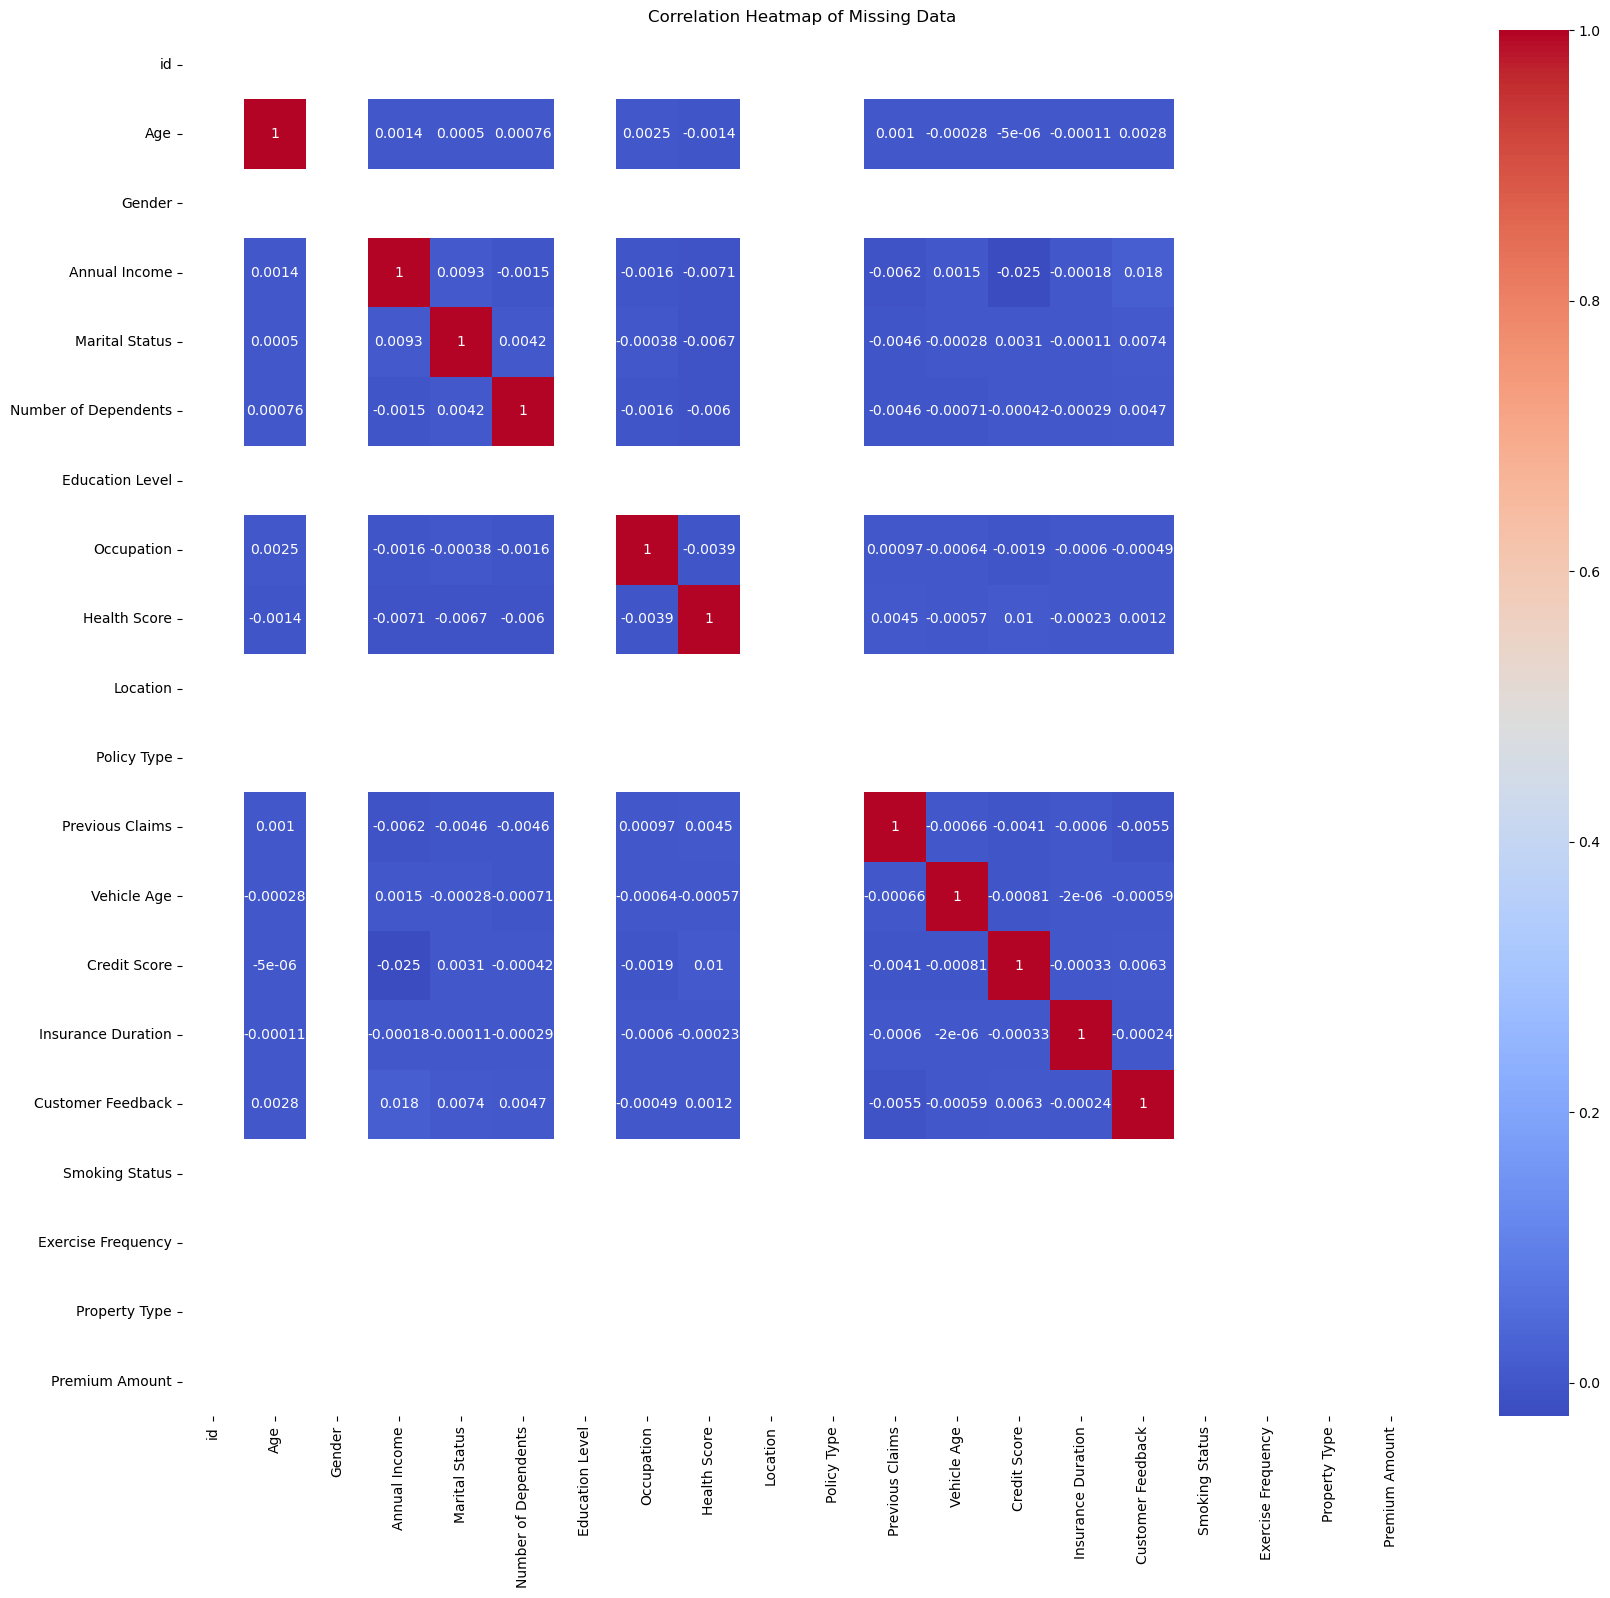

In [15]:


# Create a correlation matrix for missing data
missing_corr = train_dataset.isnull().corr()

# Generate a heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(missing_corr, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Missing Data')
plt.show()

**Little's MCAR Test**

In [17]:
from scipy.stats import chi2

def little_mcar_test(data, alpha=0.05):
    """
    Performs Little's MCAR (Missing Completely At Random) test on a dataset with missing values.
    
    Parameters:
    data (DataFrame): A pandas DataFrame with n observations and p variables, where some values are missing.
    alpha (float): The significance level for the hypothesis test (default is 0.05).
    
    Returns:
    A tuple containing:
    - A matrix of missing values that represents the pattern of missingness in the dataset.
    - A p-value representing the significance of the MCAR test.
    """
    
    # Calculate the proportion of missing values in each variable
    p_m = data.isnull().mean()
    
    # Calculate the proportion of complete cases for each variable
    p_c = data.dropna().shape[0] / data.shape[0]
    
    # Calculate the correlation matrix for all pairs of variables that have complete cases
    R_c = data.dropna().corr()
    
    # Calculate the correlation matrix for all pairs of variables using all observations
    R_all = data.corr()
    
    # Calculate the difference between the two correlation matrices
    R_diff = R_all - R_c
    
    # Calculate the variance of the R_diff matrix
    V_Rdiff = np.var(R_diff, ddof=1)
    
    # Calculate the expected value of V_Rdiff under the null hypothesis that the missing data is MCAR
    E_Rdiff = (1 - p_c) / (1 - p_m).sum()
    
    # Calculate the test statistic
    T = np.trace(R_diff) / np.sqrt(V_Rdiff * E_Rdiff)
    
    # Calculate the degrees of freedom
    df = data.shape[1] * (data.shape[1] - 1) / 2
    
    # Calculate the p-value using a chi-squared distribution with df degrees of freedom and the test statistic T
    p_value = 1 - chi2.cdf(T ** 2, df)
    
    # Create a matrix of missing values that represents the pattern of missingness in the dataset
    missingness_matrix = data.isnull().astype(int)
    
    # Return the missingness matrix and the p-value
    return missingness_matrix, p_value

In [18]:

missingness_matrix, p_value = little_mcar_test(train_dataset)
display(missingness_matrix)
display(p_value)

/opt/anaconda3/envs/GPU/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1199996,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1199997,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1199998,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

***From the correlation heatmap of the data and Little's MCAR test, we can conclude that the missing data is MCAR as correlations in the heat map are generally low and the p-value is greater than 0.05 for all features.***